<center>
<img src="http://www.bigdive.eu/wp-content/uploads/2012/05/logoBIGDIVE-01.png">
<br>
**designed for**
<img src="Intesa.png">
</center>

---

# Network science practice

## Claudio Borile

<img src="aizoon.png" width="150" align="left">

# 1. Introduction

You have learned about the basic theory behind network analysis and graph theory in the previous class, now it's time for a hands-on on those concepts to see how they can be applied in your daily practice using Python.

In this notebook we will use:
- networkx
- pandas/numpy/scipy
- matplotlib
- optional: seaborn, plotly

first of all, import the modules

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
%pylab inline

import seaborn as sb

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


Unlike machine learning and pattern recognition, where the goal is clearly defined, network analysis provides only a mathematical framework -a modelization of the problem, in the form of individual entities and relations between them- and a set of tools, but you have to figure out what kind of information you want to extract from the model. 

Now, for the first part of this practice we will analyze the network of international circulation of currencies 1890-1910 (from Flandreau, M. and C. Jobst (2005), ‘The ties that divide: a network analysis of the international monetary system 1890–1910’, Journal of Economic History, vol. 65(4)) available <a href="http://eh.net/database/international-currencies-1890-1910/">here</a> .

Load the dataset and do some exploratory analysis first

In [88]:
data = pd.read_csv('./flandreau_jobst_internationalcurrencies_data.txt', delimiter='\t')

In [89]:
data.shape

(1980, 25)

In [90]:
data.columns

Index([u'country_A', u'country_B', u'quote1890', u'quote1900', u'quote1910',
       u'colony', u'dist', u'bitrade', u'gold', u'debtburden', u'rlong',
       u'rshort1900', u'rshort1890', u'rgdp', u'rgdpcap', u'poldemo',
       u'coverage', u'gold_B', u'debtburden_B', u'rlong_B', u'rshort1900_B',
       u'rshort1890_B', u'rgdp_B', u'rgdpcap_B', u'poldemo_B'],
      dtype='object')

In [91]:
data.head()

,country_A,country_B,quote1890,quote1900,quote1910,colony,dist,bitrade,gold,debtburden,...,poldemo,coverage,gold_B,debtburden_B,rlong_B,rshort1900_B,rshort1890_B,rgdp_B,rgdpcap_B,poldemo_B
0,ARG,AUH,0,0,0,0,9.374816,5909.76,1,6.844985,...,0.3,1.94591,1,5.222065,4.01,4.58,4.48,18.14368,7.39388,0.87
1,ARG,AUS,0,0,0,0,9.360207,1258.74,1,6.844985,...,0.3,1.94591,1,6.065920,3.12,5.50,7.00,16.52440,8.29729,6.37
2,ARG,BEL,1,1,1,0,9.330780,127361.20,1,6.844985,...,0.3,1.94591,1,4.882136,3.15,4.09,3.18,17.02921,8.22443,10.66
3,ARG,BRA,0,1,1,0,7.613854,65335.41,1,6.844985,...,0.3,1.94591,0,5.516892,6.97,9.20,6.30,16.31639,6.51915,0.22
4,ARG,CAN,0,0,0,0,9.105001,5073.84,1,6.844985,...,0.3,1.94591,1,6.784091,3.61,6.50,6.50,16.58091,7.97625,8.58


In [92]:
nodes_list = sorted(list(set(data.country_A.unique().tolist() + data.country_B.unique().tolist())))

In [93]:
print "{} nodes in the network".format(len(nodes_list))
print nodes_list

45 nodes in the network
['ARG', 'AUH', 'AUS', 'BEL', 'BRA', 'CAN', 'CEY', 'CHE', 'CHL', 'CHN', 'COL', 'CUB', 'DEU', 'DNK', 'ECU', 'EGY', 'ESP', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'ICH', 'IND', 'ITA', 'JAV', 'JPN', 'MEX', 'NLD', 'NOR', 'NZL', 'OTT', 'PER', 'PHL', 'PRS', 'PRT', 'ROM', 'RUS', 'SER', 'SGP', 'SIA', 'SWE', 'URY', 'USA', 'VEN']


**Networkx** is a Python package that allows to easily create and manipulate graphs, it contains pretty much all the standard graph models, methods and algorithms that we will use today.

The documentation can be found <a href="https://networkx.github.io/documentation/stable/index.html"> here</a>.

**Exercise 1:** Create the (weighted) graph of monetary trade with networkx, the weight of each edge is the total trade between the two countries in thousand US dollars. Since it's a total trade the graph will be undirected.

hint: The basic object in networkx is an empty graph (nx.Graph(), nx.Digraph(), ..., depending on what you need). Given a graph you can add edges and nodes by calling the add_node(), add_edge() functions.

In [85]:
#example
G = nx.Graph()
G.add_node(0)
# as you can see, if I create an edge from or to a node that doesn't exist, nx automatically creates it.
G.add_edge(1, 2) 
print nx.info(G) #print a brief summary of your network basic properties

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 1
Average degree:   0.6667


**Solution**

**Exercise 2:** Print the basic global properties of the graph (diameter, clustering(s), connected components, etc.) and draw some first conclusions based on what you learned.

**Solution**

**Exercise 3:** Find the nodes with largest (1) degree and (2) strength

(the strength of a node $i$ is defined as $s_i = \sum_{j(i)} w_{ij},\ j_i \equiv \{j\in V : d(i, j)=1\}$).

**Solution**

Now that we know a little bit about our network, let's visualize it. The size of each node will be proportional to its degree and the edge width will be proportional to its weight.

In [98]:
degrees_dict = G.degree()
strength_dict = G.degree(weight='weight')

In [142]:
n_list = G.nodes()
e_list = [(i, j) for i, j in G.edges_iter()]
w_list = [w['weight']/100000. for i, j, w in G.edges_iter(data=True)]
s_list = [degrees_dict[s]*100. for s in n_list]
#s_list = [strength_dict[s]/500. for s in n_list]

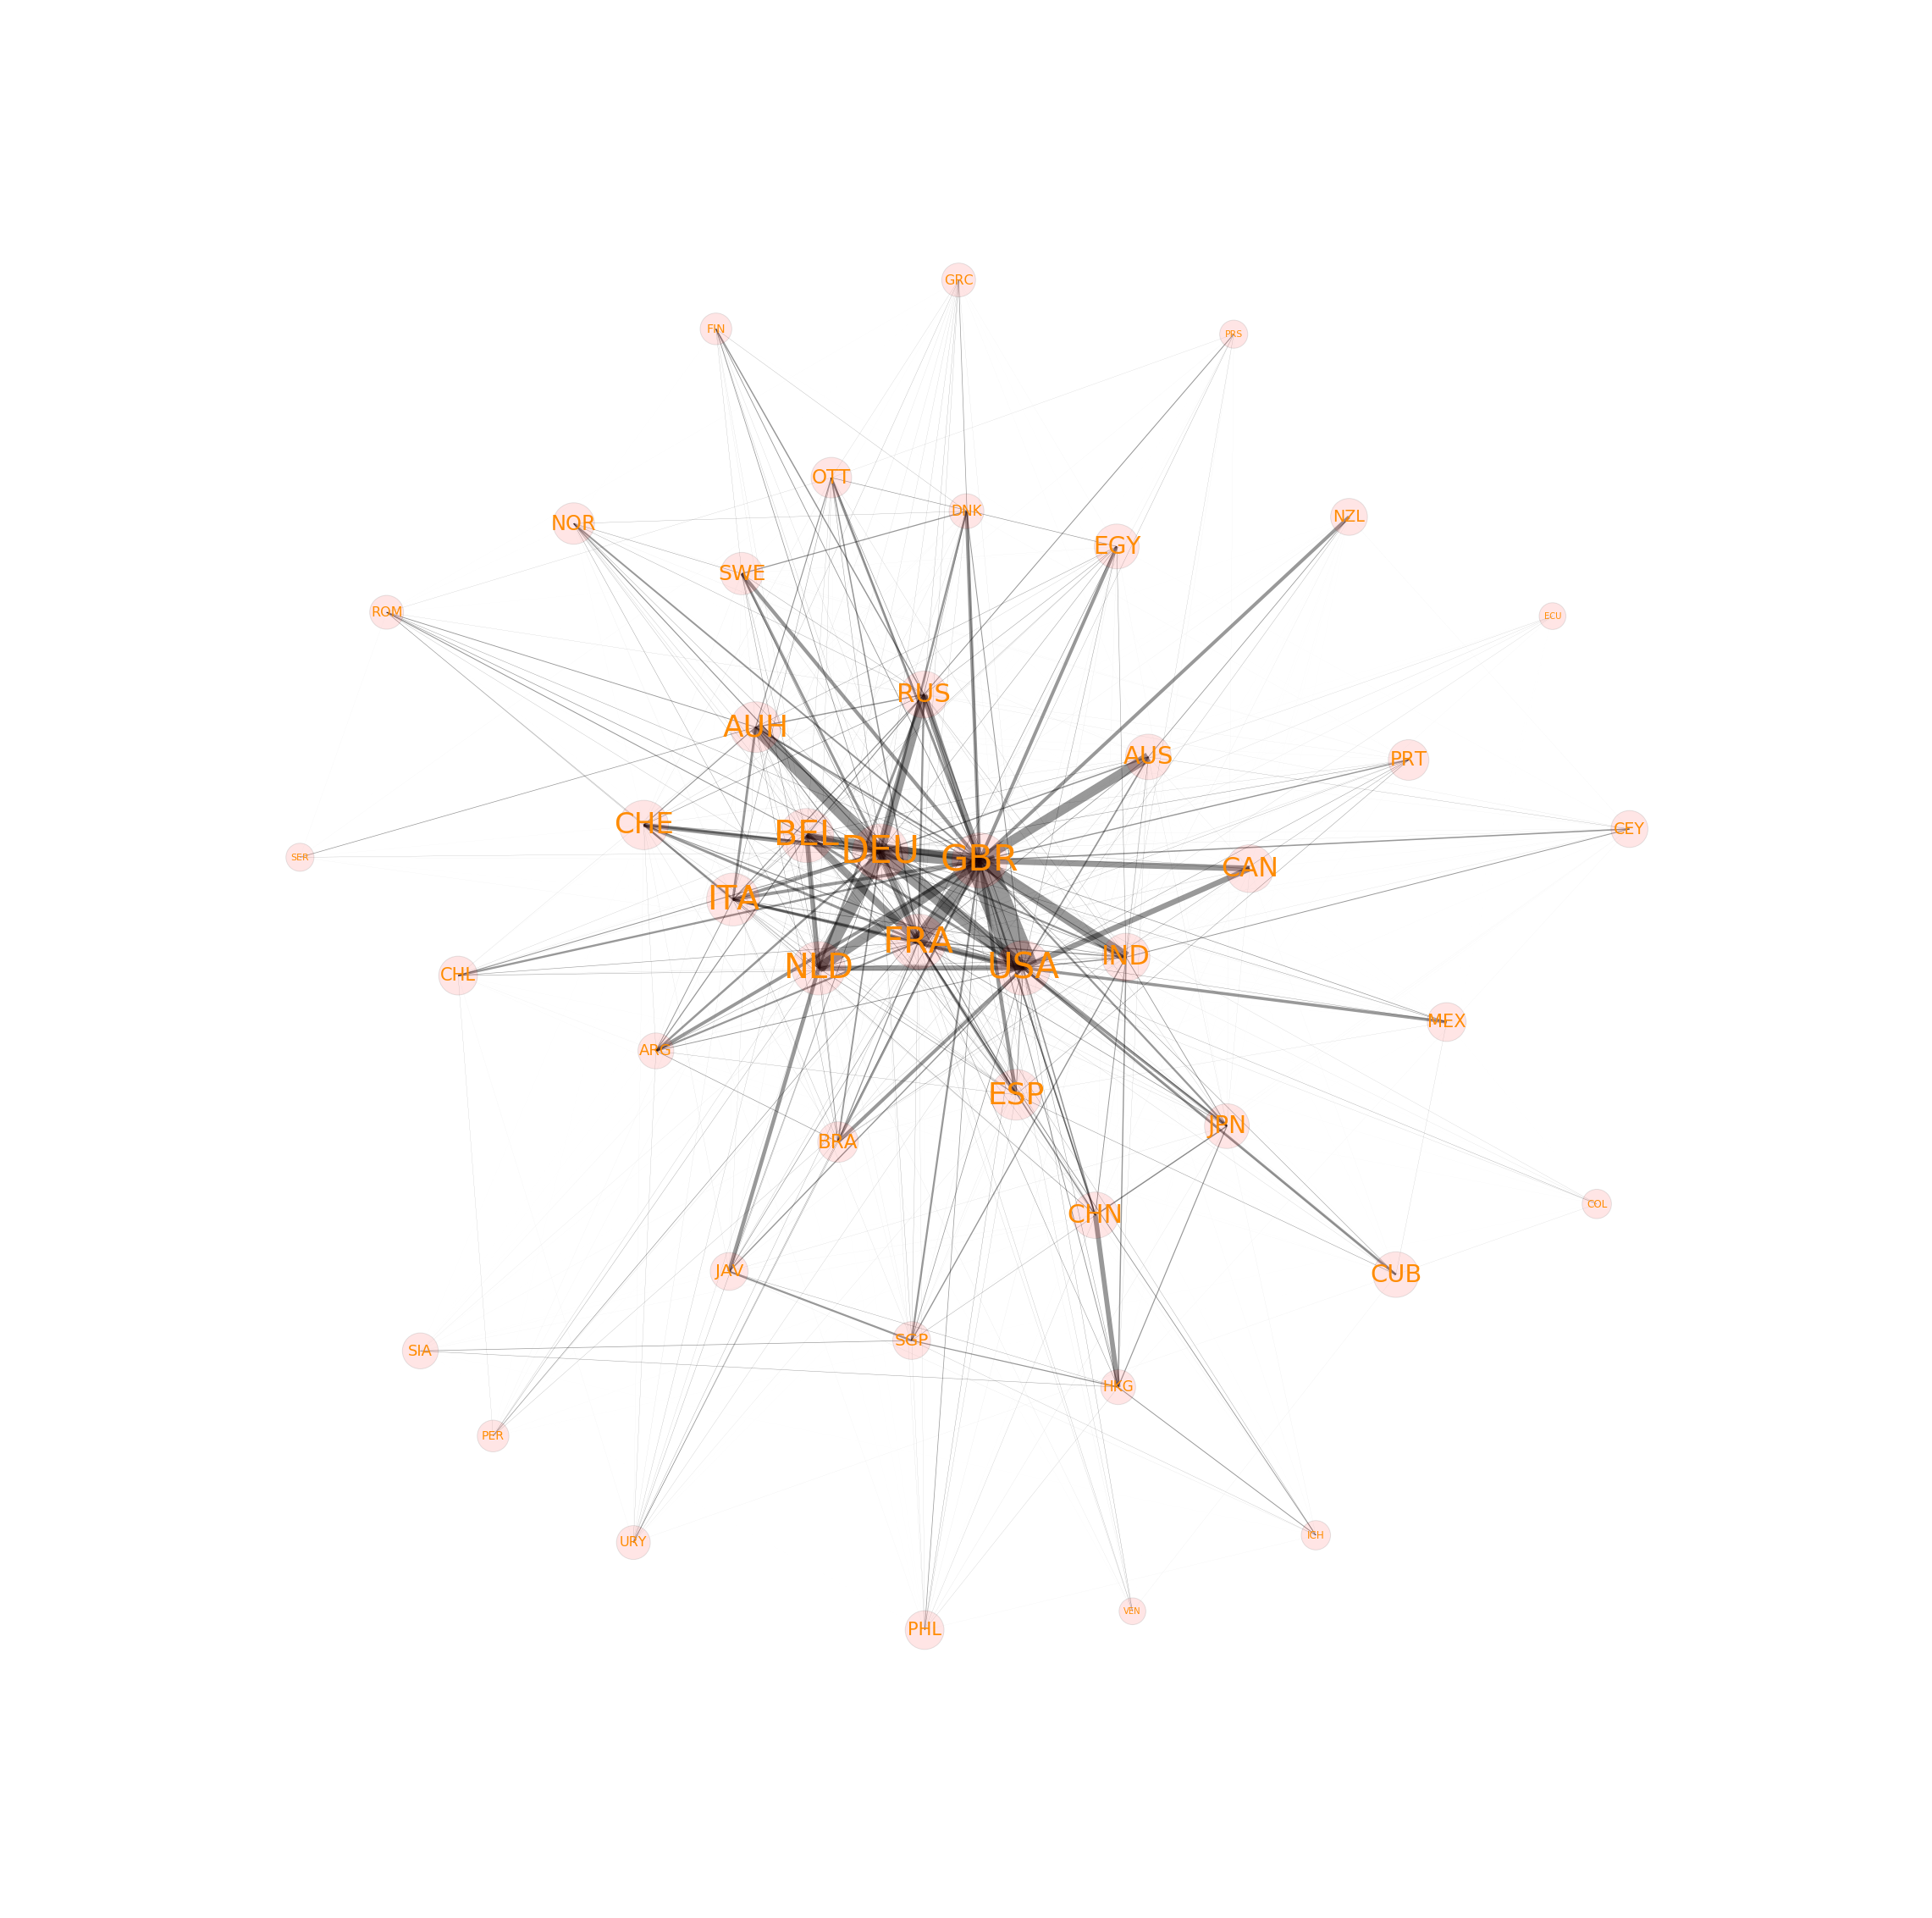

In [153]:
plt.figure(figsize=(40, 40))

#compute the nodes' position based on weights
pos = nx.spring_layout(G, k=10., iterations=5000, weight='weight')

#draw network edges
nx.draw_networkx_edges(G, pos, alpha=0.4, edgelist=e_list, width=w_list)

#draw network nodes
nx.draw_networkx_nodes(G, pos = pos, alpha=0.1, node_size=s_list, nodes_color = 'orange', nodelist=n_list)

# Print node labels separately
for n in n_list:
    plt.annotate(n,
        xy = pos[n],
        textcoords = 'offset points',
        horizontalalignment = 'center',
        verticalalignment = 'center',
        xytext = [0, 0],
        fontsize = k[n],
        #fontsize = strength_dict[n]/(2*10**5),         
        color = 'darkorange'
    )
plt.axis('off')
#plt.savefig("network.png")
plt.show()

In [167]:
T = nx.bfs_tree(G, 'ITA')

In [168]:
sp = nx.single_source_shortest_path_length(T, 'ITA')

In [169]:
shells = []
max_levels = max(sp.values())+1
level = {l: [] for l in range(max_levels)}
for n in G.nodes():
    if n in sp.keys():
        level[sp[n]].append(n)
    else:
        level[max_levels].append(n)

In [170]:
for k, v in level.iteritems():
    shells.append(v)

**Exercise 4:** based on the previous plot, draw the BFS-Tree of the network

**Solution**

# Adjacency Matrix

Let's have a look at the adjacency matrix of the graph

In [396]:
degrees_sorted = sorted(G.degree(), key=G.degree().get, reverse=True)

In [71]:
A_df = nx.to_pandas_dataframe(G, weight=None).loc[degrees_sorted, degrees_sorted]

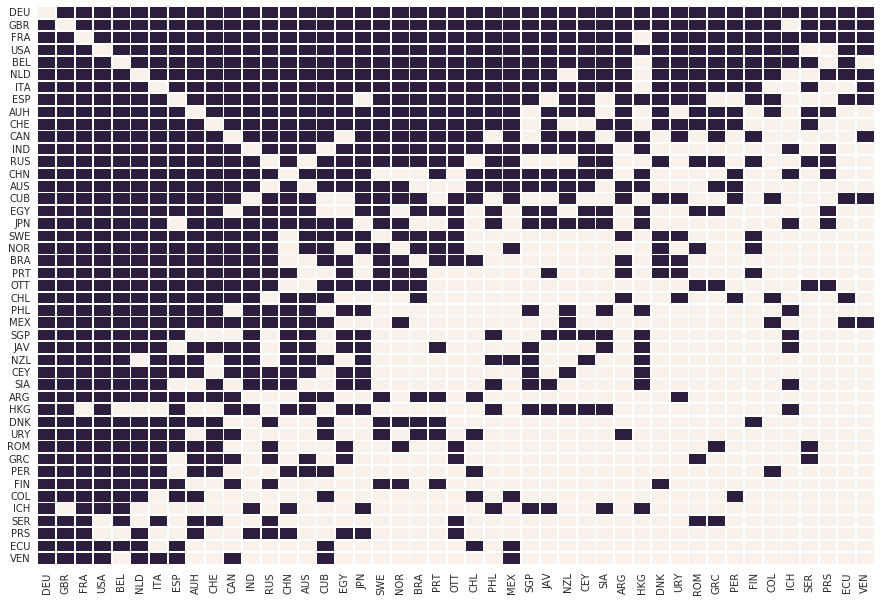

In [72]:
figsize(15, 10)
ax = sb.heatmap(A_df, cbar=False, linewidths=.9)

The adjacency matrix is not sparse, and might recall a nested structure (generalists vs. specialists)

In [73]:
A_df_w = nx.to_pandas_dataframe(G).loc[degrees_sorted, degrees_sorted]

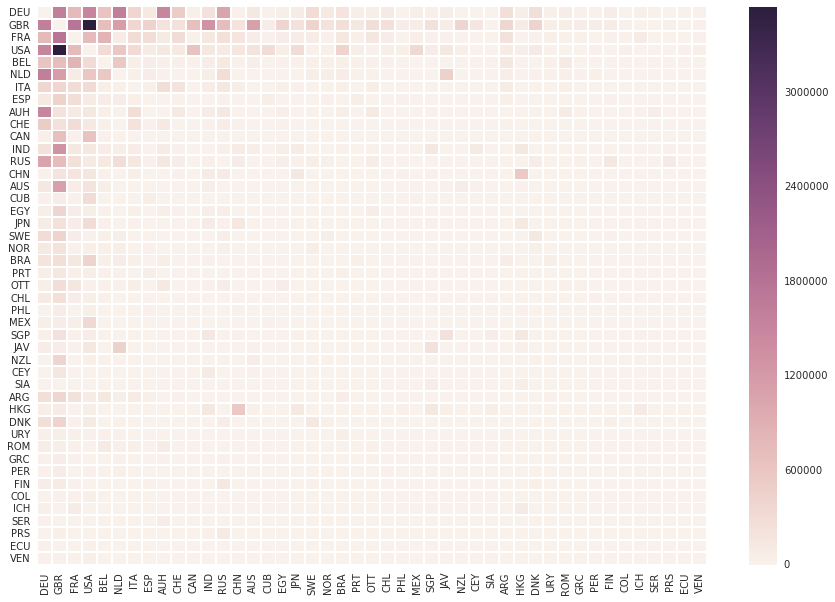

In [74]:
figsize(15, 10)
ax = sb.heatmap(A_df_w, linewidths=.9)

# Degree distribution

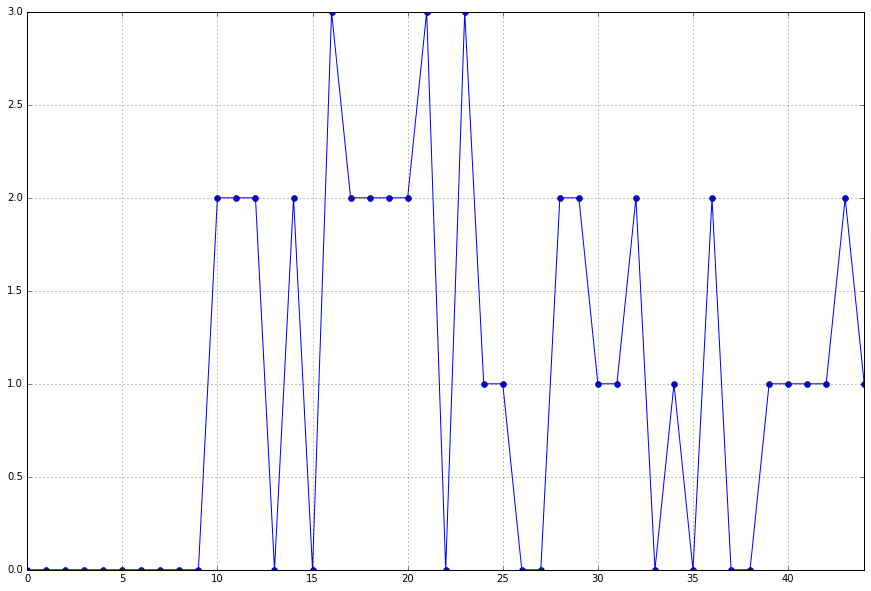

In [391]:
degree_dist = pd.Series({i: v for i, v in enumerate(nx.degree_histogram(G))})
degree_dist.sort_index().plot(grid=True, style='o-')

The degree distribution is not very suggestive of the network properties in this case. Because it is a statistical property of the random network, we must have a relevant number of nodes and links.

# Quotes network

The csv that we imported in data contains several columns, among them you can find the columns 'quote1890', 'quote1900', 'quote1910', that are binary values where 1 means that in that year in country_A there was an active market for the country_B currency.

**Exercise 6:** Create and analyze the graph of quotes in 1900 following what we did before, what are the differences that must be considered?

**Solution**

# Airports network

The file **routes.dat** contains information about the global flights' network. Each row represents an airline flight, with source and destination. The network structure of this data is evident. 

**Exercise 7:** load the file routes.dat in a pandas dataframe, do some preliminary analysis on the data structure and build the corresponding (directed, weighted) graph.

**Solution**

In [13]:
components = sorted([len(c) for c in nx.strongly_connected_components(G_flights)], reverse=True)
print 'Connected components:', components

Connected components: [3354, 10, 8, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


The graph is not connected, and it is clearly showing a giant connected component (extensive in the size $N$ of the graph) and many components made of few nodes.

The second largest components is the network of internal flights in new caledonia

In [19]:
sorted([c for c in nx.strongly_connected_components(G_flights)], reverse=True, key=len)[1]

{'BMY', 'GEA', 'ILP', 'KNQ', 'KOC', 'LIF', 'MEE', 'TGJ', 'TOU', 'UVE'}

Let's take only the largest connected components

In [21]:
G_flights = nx.subgraph(G_flights, sorted([c for c in nx.strongly_connected_components(G_flights)], reverse=True, key=len)[0])

In [23]:
print nx.info(G_flights)

Name: 
Type: DiGraph
Number of nodes: 3354
Number of edges: 37492
Average in degree:  11.1783
Average out degree:  11.1783


In [22]:
if len(components) == 1:
    print 'Network diameter =', nx.diameter(G_flights)
else:
    print "Graph not connected."
print 'Average clustering coeff. =', nx.average_clustering(G_flights.to_undirected())
print 'Global clustering coeff. =', nx.transitivity(G_flights)


Graph not connected.
Average clustering coeff. = 0.495184403421
Global clustering coeff. = 0.248782051498


**Exercise 8:** Build and visualize the graph's adjacency matrix and the degree(s) distribution

**Solution**

# Network robustness

Suppose that a computer virus is crashing the communication system of one random airport at the time, what is the expected number of nodes that have fail so that the network breaks apart?

In [63]:
g = G_flights.copy()
l = []
i = 0
nodes_list = g.nodes()
while len(nodes_list) > 0:
    if i%10 == 0:
        print i,
        cc = len(sorted([c for c in nx.strongly_connected_components(g)], reverse=True, key=len)[0])
        p = 1.*cc/len(G_flights.nodes())
        l.append((i, p))
    i+=1
    rnd_node = nodes_list[random.randint(len(nodes_list))]
    g.remove_node(rnd_node)
    nodes_list = g.nodes()

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 2

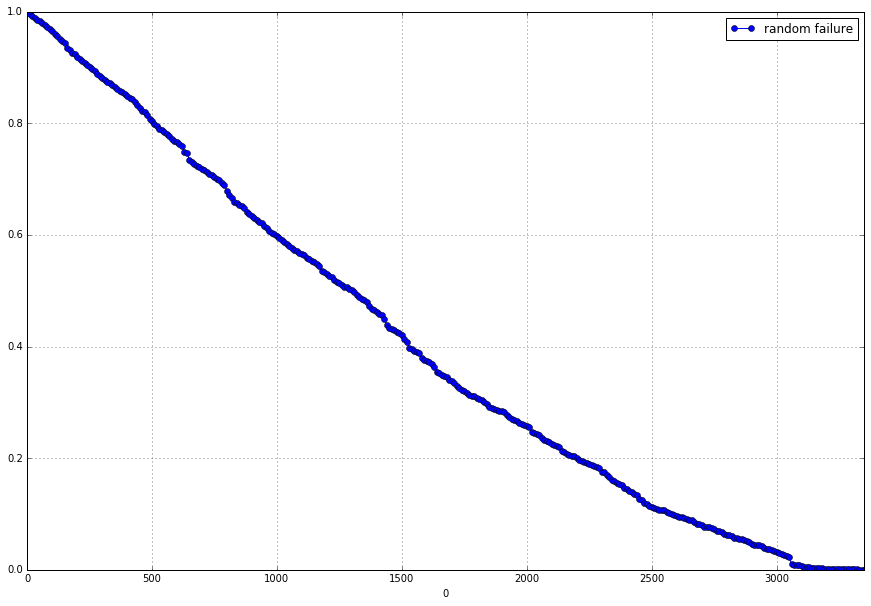

In [72]:
fail = pd.Series(l).apply(pd.Series).set_index(0)
fail.columns = ['random failure']
fail.plot(figsize=(15, 10), grid=True, style='o-');

**Exercise 9**: Now the virus is getting smarter, and instead of attacking a random node it gets first the hubs. How many nodes does he have to attack now?

**Solution**

**Exercise 10:** What would happen in a purely random network (Erdos-Renyi)?

In [85]:
ER = nx.erdos_renyi_graph(len(G_flights), p=0.00335, directed=True)
print nx.info(ER)

Name: gnp_random_graph(3354,0.00335)
Type: DiGraph
Number of nodes: 3354
Number of edges: 37667
Average in degree:  11.2305
Average out degree:  11.2305


**Exercise 11:** Show all the shortest paths for getting from Turin (TRN) to Linz (LNZ)

**Solution**

As you know, the **betweennes** centrality of a node measures how much that node act as a bridge connecting all the other nodes, in terms of shortest paths. 

$\displaystyle\mathcal{B} = \sum_{s\neq v\neq t}\frac{\sigma(s, t | v)}{\sigma(st)}$

Networkx provides a built-in version of the algorithm for computing the beweenness (like very much _all_ standard algorithms on graphs).

If we compute the betweenness for the flights network, we can see that something's unexpected! 

**Exercise 12:** Compute the betweenness centrality for all airports and answer:
- which airport is the most central?
- What's _quantitatively_ strange? 

(In-depth analysis: <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1142352/pdf/pnas-0407994102.pdf">anomalous centrality</a>)

# Community detection

Community detection is an _ill defined_ problem. We are trying to assign to each node a label without knowing the ground truth (yes, it's a clustering). Furthermore usually we don't know how many communities we are looking for.
That is why there are so many different CD algorithms, with a great variety of mathematical and logical approaches to tackle the problem, and why it's so crucial to assess the best option for the specific case under scrutiny.

We must be careful when running community detection algorithms!

## Girvan - Newman algorithm

http://www.pnas.org/content/99/12/7821.full.pdf

**Exercise 13:** Implement the Girvan-Newman algorithm

**Exercise 13b:** What kind of result was returned by the algorithm? What does it mean? What would you do to extract information from it?

A little bit more structured

In [340]:
#keep removing edges from Graph until one of the connected components of Graph splits into two
#compute the edge betweenness
def CmtyGirvanNewmanStep(G):
    init_ncomp = nx.number_connected_components(G)    #no of components
    ncomp = init_ncomp
    while ncomp <= init_ncomp:
        bw = nx.edge_betweenness_centrality(G, weight='weight')    #edge betweenness for G
        #find the edge with max centrality
        max_ = max(bw.values())
        #find the edge with the highest centrality and remove all of them if there is more than one!
        for k, v in bw.iteritems():
            if float(v) == max_:
                G.remove_edge(k[0],k[1])    #remove the central edge
        ncomp = nx.number_connected_components(G)    #recalculate the no of components

#compute the modularity of current split
def _GirvanNewmanGetModularity(G, deg_, m_):
    New_A = nx.adj_matrix(G)
    New_deg = {}
    New_deg = UpdateDeg(New_A, G.nodes())
    #Let's compute the Q
    comps = nx.connected_components(G)    #list of components    
    print 'No of communities in decomposed G: %d' % nx.number_connected_components(G)
    Mod = 0    #Modularity of a given partitionning
    for c in comps:
        EWC = 0    #no of edges within a community
        RE = 0    #no of random edges
        for u in c:
            EWC += New_deg[u]
            RE += deg_[u]        #count the probability of a random edge
        Mod += ( float(EWC) - float(RE*RE)/float(2*m_) )
    Mod = Mod/float(2*m_)
    return Mod

def UpdateDeg(A, nodes):
    deg_dict = {}
    n = len(nodes)  #len(A) ---> some ppl get issues when trying len() on sparse matrixes!
    B = A.sum(axis = 1)
    for i in range(n):
        deg_dict[nodes[i]] = B[i, 0]
    return deg_dict

#run GirvanNewman algorithm and find the best community split by maximizing modularity measure
def runGirvanNewman(G, Orig_deg, m_):
    #let's find the best split of the graph
    BestQ = -1.0
    Q = -1.0
    components = []
    while G.number_of_edges() > 0:    
        CmtyGirvanNewmanStep(G)
        Q = _GirvanNewmanGetModularity(G, Orig_deg, m_);
        print "Modularity of decomposed G: %f" % Q
        if Q > BestQ:
            BestQ = Q
            Bestcomps = nx.connected_components(G)    #Best Split
            #print "Components:", [c for c in Bestcomps]
            components.append([c for c in Bestcomps])
    if BestQ > 0.0:
        print "Max modularity (Q): %f" % BestQ
        #print "Graph communities:", Bestcomps
    else:
        print "Max modularity (Q): %f" % BestQ
    return components

In [341]:
netAZ = routes[routes.Airline == 'AZ'].groupby(['Source', 'Dest']).size().to_frame('cnt').reset_index()
G_AZ = nx.from_pandas_dataframe(netAZ, 'Source', 'Dest', edge_attr='cnt')

In [369]:
G_gn = G_AZ.copy().to_undirected()

In [343]:
n = G_gn.number_of_nodes()    #|V|
A = nx.adj_matrix(G_gn)    #adjacenct matrix

m_ = 0.0    #the weighted version for number of edges
for i in range(0,n):
    for j in range(0,n):
        m_ += A[i,j]
m_ = m_/2.0

#calculate the weighted degree for each node
Orig_deg = {}
Orig_deg = UpdateDeg(A, G_gn.nodes())

#run Newman alg
GN_comms = runGirvanNewman(G_gn, Orig_deg, m_)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275


In [353]:
airports_names = pd.read_csv('airports.dat', index_col=0, header=None)

In [363]:
airport_names = airports_names.set_index(4)[2].dropna().to_dict()

In [366]:
for i, c in enumerate(GN_comms[-1]):
    print 'community', i
    for a in c:
        print '\t', airport_names[a]

community 0
	Copenhagen
	Lamezia
	Lyon
	Naples
	Catania
	Lisbon
	Tirana
	Prague
	Berlin
	Riga
	Tashkent
	Reggio Calabria
	Palermo
	Villafranca
	Toulouse
	Moscow
	Venice
	Torino
	Bologna
	Genoa
	Olbia
	Bishkek
	Ronchi De Legionari
	Iasi
	St. Petersburg
	Vienna
	Pisa
	Alghero
	Bari
	London
	Tokyo
community 1
	New York
	Edinburgh
	Dakar
	Yerevan
	Boston
	Dublin
	Montreal
	Brest
	Bordeaux
	Bilbao
	Detroit
	Philipsburg
	Oslo
	Ho Chi Minh City
	Newcastle
	Nuernberg
	Hong Kong
	Frankfurt
	Florence
	Hanoi
	Santiago
	Abidjan
	Geneva
	St. Thomas
	Stuttgart
	Gothenborg
	Aberdeen
	Duesseldorf
	Paris
	Punta Cana
	Montpellier
	Clermont-Ferrand
	Toronto
	Los Angeles
	Rennes
	Nantes
	Pau
	Manchester
community 2
	Greenville
	Milwaukee
	Rochester
	Gainesville
	New Orleans
	Columbus
	Panama City
	Atlanta
	Wilmington
	Minneapolis
	Little Rock
	Gulfport
	Fort Lauderdale
	Denver
	Newark
	Cincinnati
	El Paso
	Greensboro
	San Diego
	Valparaiso
	Dayton
	Windsor Locks
	Myrtle Beach
	Oklahoma City
	Washington
	H

**Exercise:** Assign to each node in G_AZ its community